In [68]:
import random
import csv

#gerando data para analise

with open('dados.csv', 'w', newline='') as file:
    output = csv.writer(file)

    cidades = ['Sao Paulo', 'Rio de Janeiro', 'Brasilia', 'Porto Alegre', 'Salvador', 'Recife']
    pcds = ['Sim', 'Não']
    rendas = ['Sim', 'Não']
    racas = ['0', '1', '2', '3', '4']
    generos = ['0', '1', '2']
    idades = ['Sim', 'Não']
    orientacaoSexuais = ['Sim', 'Não']
    cursos = ['Administracao', 'Engenharia Civil', 'Ciencia da Computacao', 'Direito', 'Medicina']
    experiencias = ['Sim', 'Não']
    linguas = ['portugues', 'ingles', 'espanhol', 'frances', 'mandarim']
    modalidades = ['presencial', 'EaD', 'semipresencial']
    vulnerabilidades = ['Sim', 'Não']

    for _ in range(500):
        cidade = random.choice(cidades)
        pcd = random.choice(pcds)
        renda = random.choice(rendas)
        raca = random.choice(racas)
        genero = random.choice(generos)
        idade = random.choice(idades)
        curso = random.choice(cursos)
        orientacaoSexual = random.choice(orientacaoSexuais)
        experiencia = random.choice(experiencias)
        lingua = random.choice(linguas)
        modalidade = random.choice(modalidades)
        vulnerabilidade = random.choice(vulnerabilidades)


        output.writerow([cidade, pcd, renda, raca, genero, orientacaoSexual, idade, curso, experiencia, lingua, modalidade,vulnerabilidade])


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [69]:
url = 'dados.csv'

header = ['cidade', 'pcd', 'renda', 'raca', 'genero', 'orientacaoSexual', 'idade', 'curso', 'experiencia', 'lingua', 'modalidade', 'vulnerabilidade']

df = pd.read_csv(url, header=None, names=header)

df.head()

,cidade,pcd,renda,raca,genero,orientacaoSexual,idade,curso,experiencia,lingua,modalidade,vulnerabilidade
0,Salvador,Não,Não,2,1,Sim,Não,Direito,Sim,ingles,semipresencial,Sim
1,Porto Alegre,Sim,Não,1,0,Sim,Sim,Medicina,Sim,espanhol,semipresencial,Sim
2,Sao Paulo,Não,Não,0,0,Não,Sim,Direito,Não,frances,EaD,Não
3,Porto Alegre,Não,Sim,1,2,Não,Não,Direito,Não,frances,semipresencial,Sim
4,Porto Alegre,Não,Não,2,1,Não,Sim,Administracao,Sim,espanhol,EaD,Não


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cidade            500 non-null    object
 1   pcd               500 non-null    object
 2   renda             500 non-null    object
 3   raca              500 non-null    int64 
 4   genero            500 non-null    int64 
 5   orientacaoSexual  500 non-null    object
 6   idade             500 non-null    object
 7   curso             500 non-null    object
 8   experiencia       500 non-null    object
 9   lingua            500 non-null    object
 10  modalidade        500 non-null    object
 11  vulnerabilidade   500 non-null    object
dtypes: int64(2), object(10)
memory usage: 47.0+ KB


In [71]:
df.tail()

,cidade,pcd,renda,raca,genero,orientacaoSexual,idade,curso,experiencia,lingua,modalidade,vulnerabilidade
495,Sao Paulo,Sim,Não,4,1,Não,Sim,Ciencia da Computacao,Não,frances,presencial,Não
496,Recife,Não,Sim,3,1,Não,Não,Medicina,Não,espanhol,EaD,Sim
497,Sao Paulo,Sim,Não,3,1,Sim,Não,Engenharia Civil,Sim,espanhol,semipresencial,Sim
498,Salvador,Sim,Sim,0,1,Sim,Sim,Medicina,Sim,espanhol,semipresencial,Sim
499,Salvador,Não,Sim,4,0,Sim,Sim,Ciencia da Computacao,Não,frances,semipresencial,Sim


Análises


In [72]:
df.describe()

,raca,genero
count,500.000000,500.00000
mean,1.932000,1.01600
std,1.446222,0.81306
min,0.000000,0.00000
25%,1.000000,0.00000
50%,2.000000,1.00000
75%,3.000000,2.00000
max,4.000000,2.00000


In [73]:
df.isnull().sum()

cidade              0
pcd                 0
renda               0
raca                0
genero              0
orientacaoSexual    0
idade               0
curso               0
experiencia         0
lingua              0
modalidade          0
vulnerabilidade     0
dtype: int64

In [74]:
df['cidade'].value_counts()

Salvador          96
Sao Paulo         95
Porto Alegre      90
Recife            85
Brasilia          77
Rio de Janeiro    57
Name: cidade, dtype: int64

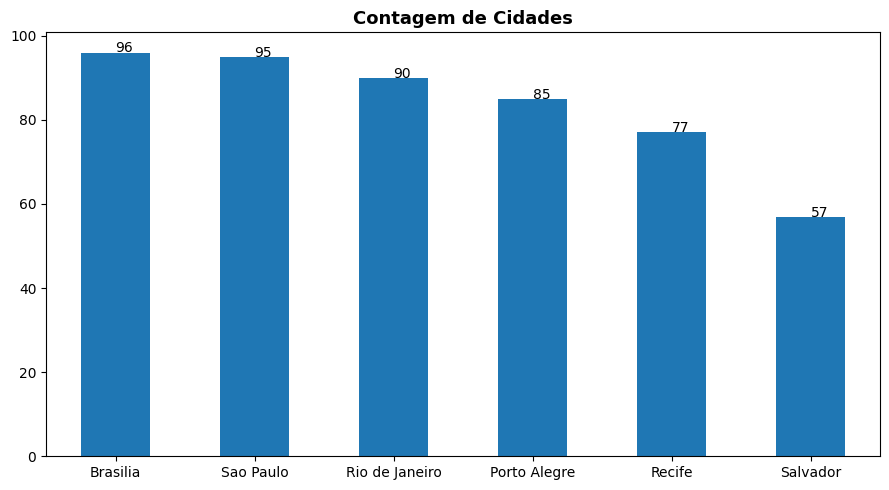

In [75]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Brasilia', 'Sao Paulo', 'Rio de Janeiro', 'Porto Alegre', 'Recife', 'Salvador']
ax = df.cidade.value_counts().plot(kind='bar')
ax.set_title('Contagem de Cidades', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [31]:
df['pcd'].value_counts()

Sim    270
Não    230
Name: pcd, dtype: int64

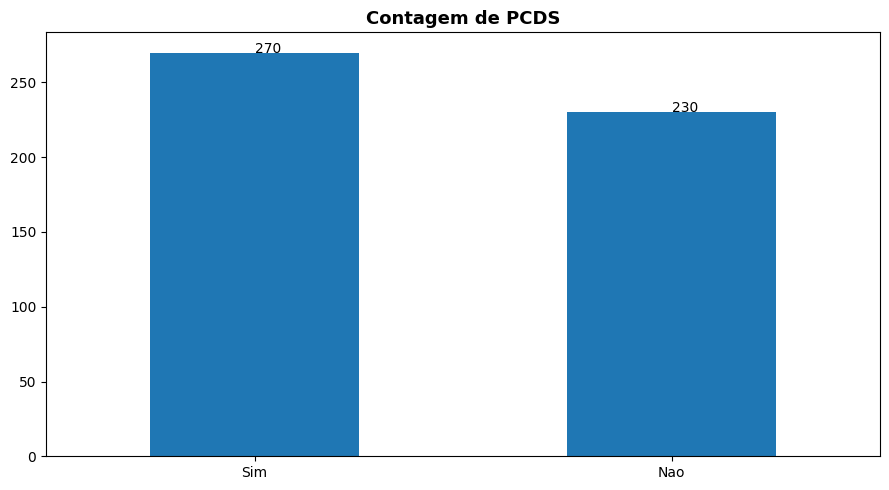

In [34]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Sim', 'Nao']
ax = df.pcd.value_counts().plot(kind='bar')
ax.set_title('Contagem de PCDS', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [33]:
df['renda'].value_counts()

Não    254
Sim    246
Name: renda, dtype: int64

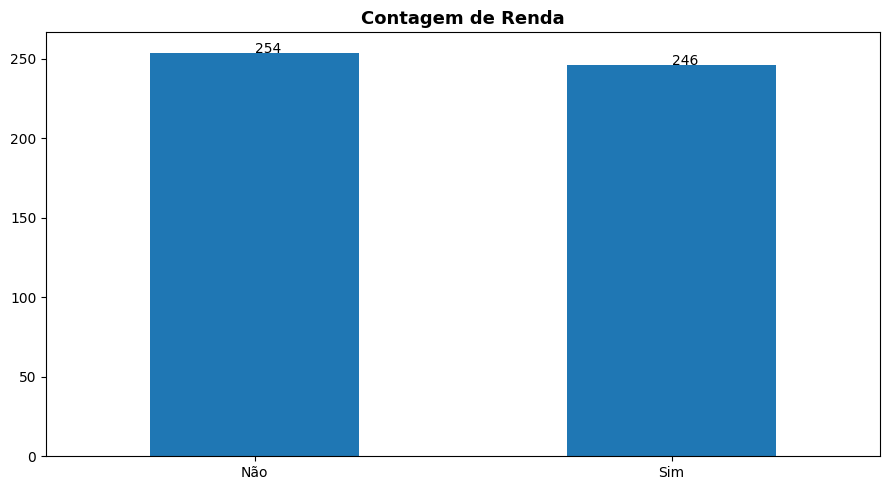

In [35]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Não', 'Sim']
ax = df.renda.value_counts().plot(kind='bar')
ax.set_title('Contagem de Renda', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [36]:
df['raca'].value_counts()

2    115
3    108
4    101
0     88
1     88
Name: raca, dtype: int64

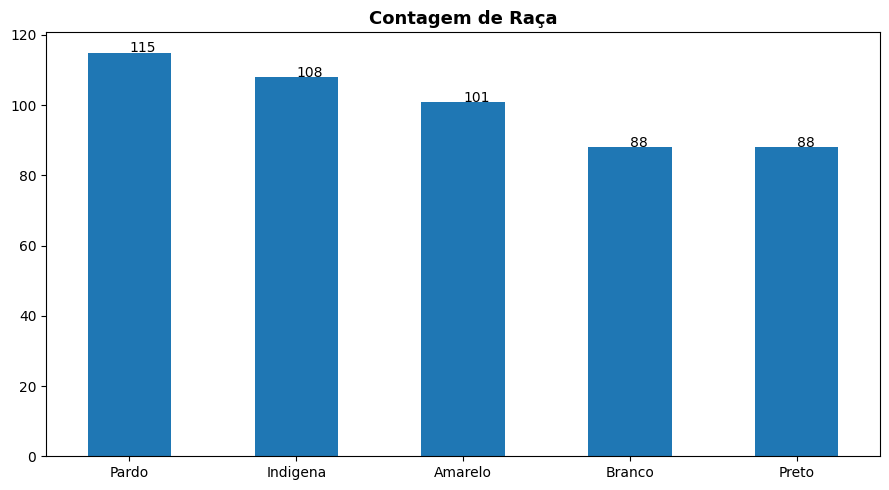

In [38]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Pardo', 'Indigena', 'Amarelo', 'Branco', 'Preto']
ax = df.raca.value_counts().plot(kind='bar')
ax.set_title('Contagem de Raça', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [39]:
df['genero'].value_counts()

1    170
2    165
0    165
Name: genero, dtype: int64

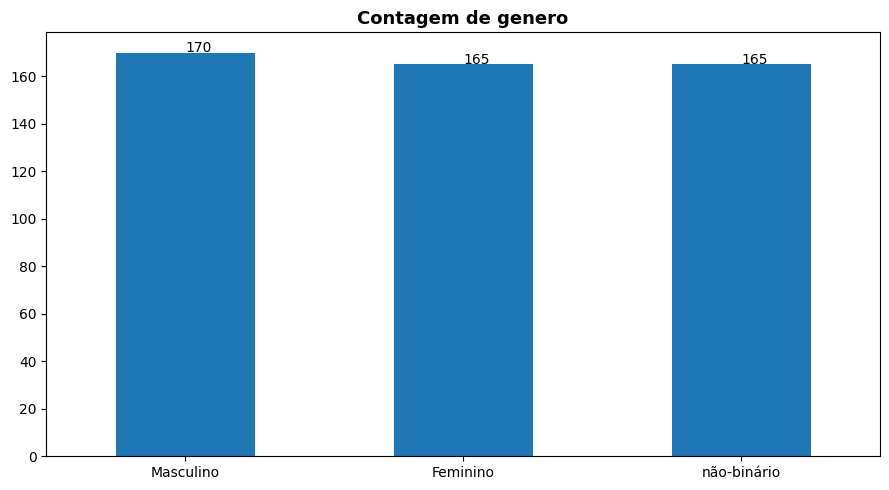

In [40]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Masculino', 'Feminino', 'não-binário']
ax = df.genero.value_counts().plot(kind='bar')
ax.set_title('Contagem de genero', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [41]:
df['orientacaoSexual'].value_counts()

Sim    259
Não    241
Name: orientacaoSexual, dtype: int64

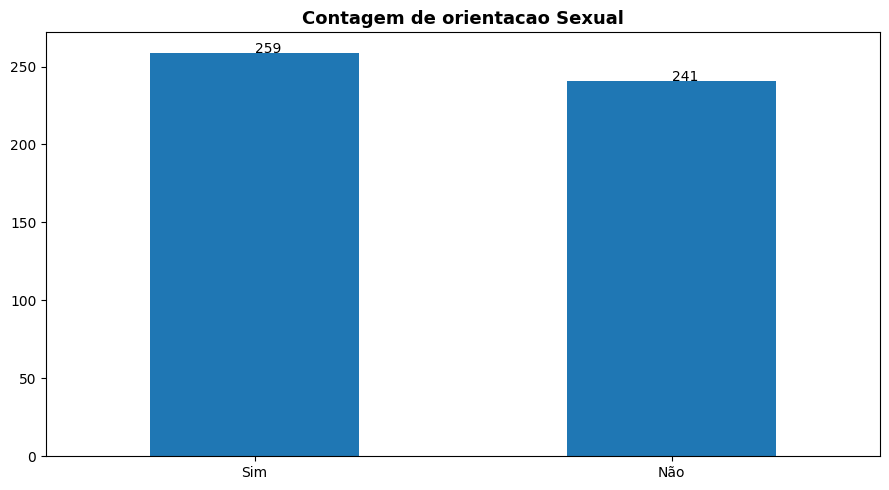

In [42]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Sim', 'Não']
ax = df.orientacaoSexual.value_counts().plot(kind='bar')
ax.set_title('Contagem de orientacao Sexual', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [43]:
df['idade'].value_counts()

Sim    252
Não    248
Name: idade, dtype: int64

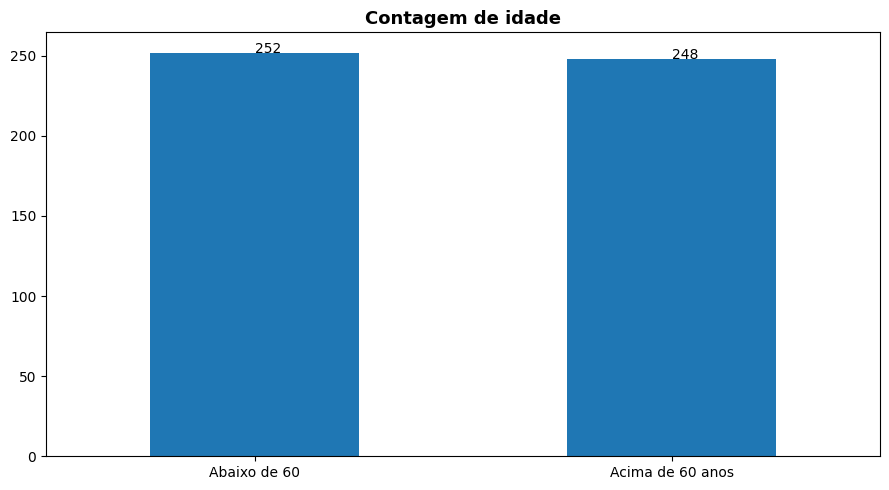

In [45]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Abaixo de 60', 'Acima de 60 anos']
ax = df.idade.value_counts().plot(kind='bar')
ax.set_title('Contagem de idade', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [46]:
df['curso'].value_counts()

Direito                  118
Engenharia Civil         104
Ciencia da Computacao     97
Administracao             93
Medicina                  88
Name: curso, dtype: int64

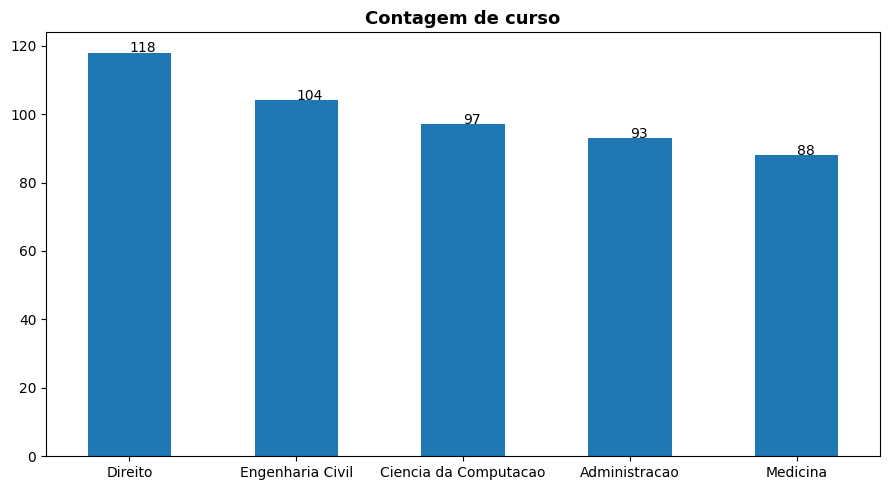

In [48]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Direito', 'Engenharia Civil', 'Ciencia da Computacao', 'Administracao', 'Medicina']
ax = df.curso.value_counts().plot(kind='bar')
ax.set_title('Contagem de curso', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [49]:
df['experiencia'].value_counts()

Sim    265
Não    235
Name: experiencia, dtype: int64

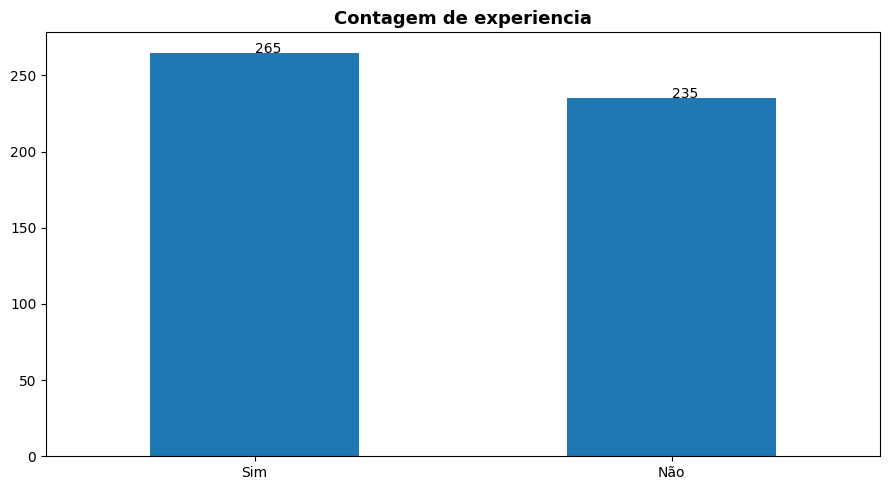

In [50]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Sim', 'Não']
ax = df.experiencia.value_counts().plot(kind='bar')
ax.set_title('Contagem de experiencia', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [51]:
df['lingua'].value_counts()

portugues    119
ingles       106
espanhol     100
frances       94
mandarim      81
Name: lingua, dtype: int64

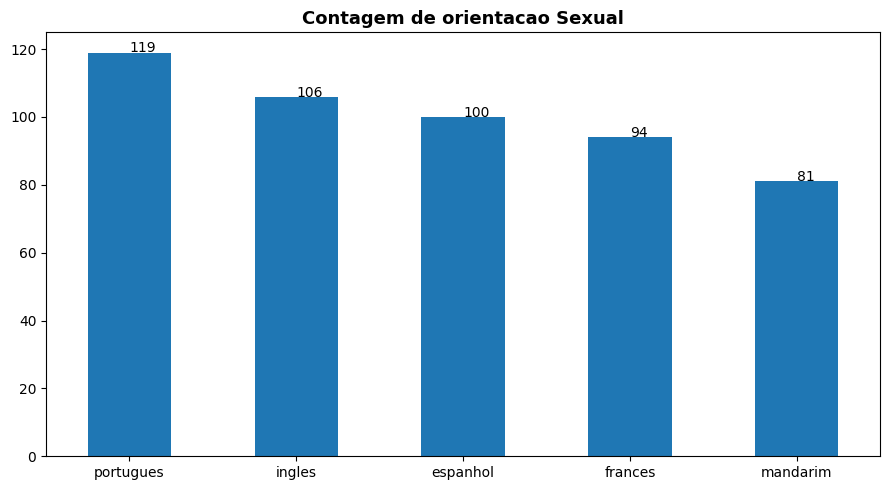

In [52]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['portugues', 'ingles', 'espanhol', 'frances', 'mandarim']
ax = df.lingua.value_counts().plot(kind='bar')
ax.set_title('Contagem de orientacao Sexual', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [53]:
df['modalidade'].value_counts()

presencial        180
EaD               173
semipresencial    147
Name: modalidade, dtype: int64

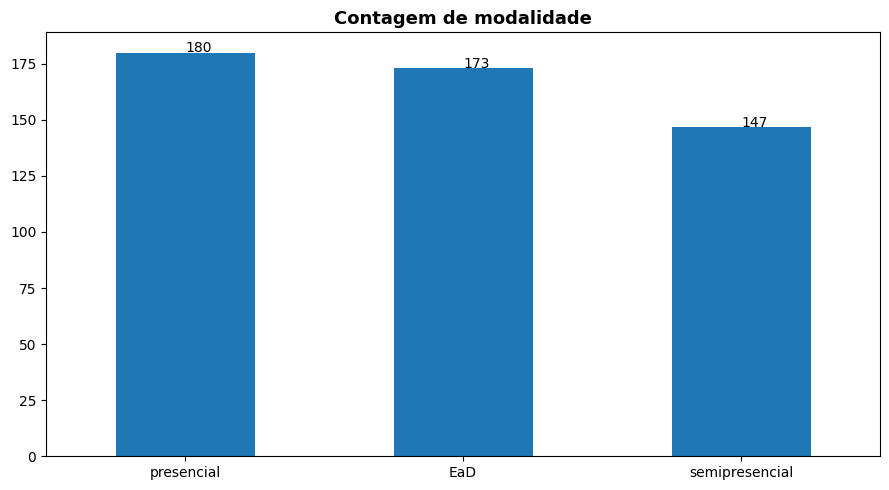

In [56]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['presencial', 'EaD', 'semipresencial']
ax = df.modalidade.value_counts().plot(kind='bar')
ax.set_title('Contagem de modalidade', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

In [77]:
df['vulnerabilidade'].value_counts()

Sim    266
Não    234
Name: vulnerabilidade, dtype: int64

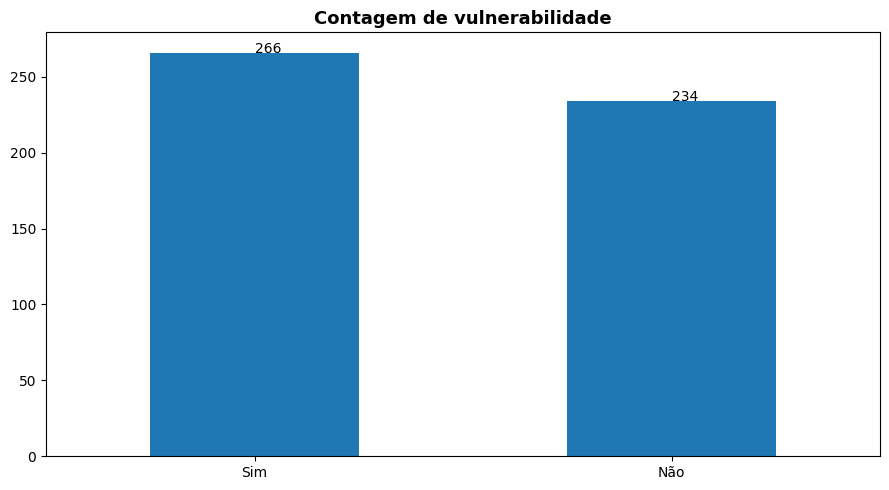

In [78]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Sim', 'Não']
ax = df.vulnerabilidade.value_counts().plot(kind='bar')
ax.set_title('Contagem de vulnerabilidade', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Correlação dos atributos


In [79]:
# Fixing the existing 'cidade' mapping
df['cidade'] = df['cidade'].replace({
    'Brasilia': 0,
    'Sao Paulo': 1,
    'Rio de Janeiro': 2,
    'Porto Alegre': 3,
    'Recife': 4,
    'Salvador': 5
})

# Encoding for 'pcd'
df['pcd'] = df['pcd'].replace({'Sim': 0, 'Não': 1})

# Encoding for 'renda'
df['renda'] = df['renda'].replace({'Sim': 0, 'Não': 1})

# Encoding for 'orientacaoSexual'
df['orientacaoSexual'] = df['orientacaoSexual'].replace({'Sim': 0, 'Não': 1})

# Encoding for 'idade'
df['idade'] = df['idade'].replace({'Sim': 0, 'Não': 1})

# Encoding for 'curso'
df['curso'] = df['curso'].replace({
    'Direito': 0,
    'Engenharia Civil': 1,
    'Ciencia da Computacao': 2,
    'Administracao': 3,
    'Medicina': 4
})

# Encoding for 'experiencia'
df['experiencia'] = df['experiencia'].replace({'Sim': 0, 'Não': 1})

# Encoding for 'lingua'
df['lingua'] = df['lingua'].replace({
    'portugues': 0,
    'ingles': 1,
    'espanhol': 2,
    'frances': 3,
    'mandarim': 4
})

# Encoding for 'modalidade'
df['modalidade'] = df['modalidade'].replace({
    'presencial': 0,
    'EaD': 1,
    'semipresencial': 2
})

# Encoding for 'raca'
df['raca'] = df['raca'].replace({
    'Branco': 0,
    'Preto': 1,
    'Pardo': 2,
    'Indigena': 3,
    'Amarelo': 4
})

# Encoding for 'Genero'
df['genero'] = df['genero'].replace({
    'não-binário': 0,
    'Masculino': 1,
    'Feminino': 2
})

# Encoding for 'Vulnerabilidade'
df['vulnerabilidade'] = df['vulnerabilidade'].replace({
    'Sim': 0,
    'Não': 1
})

In [80]:
df.head()

,cidade,pcd,renda,raca,genero,orientacaoSexual,idade,curso,experiencia,lingua,modalidade,vulnerabilidade
0,5,1,1,2,1,0,1,0,0,1,2,0
1,3,0,1,1,0,0,0,4,0,2,2,0
2,1,1,1,0,0,1,0,0,1,3,1,1
3,3,1,0,1,2,1,1,0,1,3,2,0
4,3,1,1,2,1,1,0,3,0,2,1,1


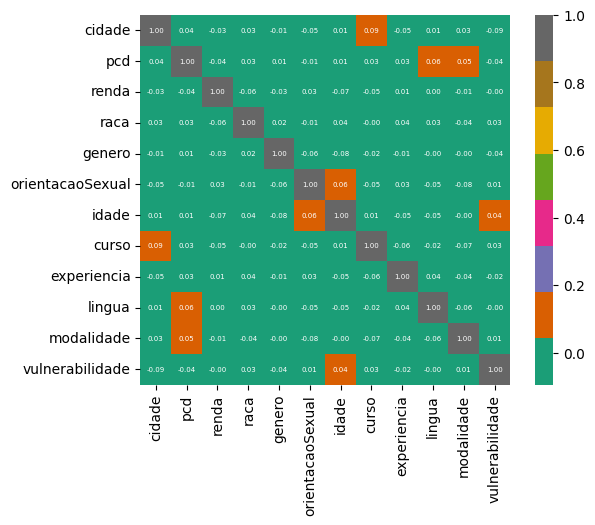

In [81]:
corr_matx = df.corr()

heatmap = sns.heatmap(corr_matx, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, cmap='Dark2')

Correlações Mais Altas:

raca e renda têm uma correlação de 0.10, que ainda é baixa, mas é uma das maiores fora da diagonal principal.
lingua e modalidade também possuem uma correlação de 0.10.
Correlações Negativas:

Há algumas correlações negativas, mas todas são baixas. Por exemplo, raca e cidade têm uma correlação de -0.11.

# KNN

In [82]:
X = df[['pcd', 'renda', 'idade', 'orientacaoSexual', 'raca']]
y = df['vulnerabilidade']
print(f"Formato das tabelas de dados {X.shape} e classes {y.shape}")

Formato das tabelas de dados (500, 5) e classes (500,)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {X_test.shape}")



Formato das tabelas de dados de treino (400, 5) e teste (100, 5)


In [84]:
k = 9
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [85]:
y_pred = model.predict(X_test)
print("Predição: {}".format(y_pred))

Predição: [0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1]


In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Acerto médio de classificação: ", accuracy)

Acerto médio de classificação:  0.53



# REGRESSÃO LINEAR

In [87]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_test_predito = lin_model.predict(X_test)
print("Predição usando regressão, retorna valores continuos: {}".format(y_test_predito))

Predição usando regressão, retorna valores continuos: [0.48750918 0.42734695 0.51952322 0.46309888 0.50623381 0.46878456
 0.43102359 0.49484646 0.49515865 0.50420878 0.50623381 0.48579633
 0.46878456 0.49655932 0.43329908 0.43670927 0.47043615 0.44607158
 0.46878456 0.45171152 0.39357433 0.50079859 0.41798464 0.44778443
 0.44778443 0.48579633 0.41401181 0.53059838 0.4554339  0.42905981
 0.53628406 0.39357433 0.43273644 0.46650906 0.53457121 0.46138602
 0.51755944 0.42337413 0.53628406 0.51187376 0.53457121 0.53628406
 0.44778443 0.487197   0.51528394 0.49655932 0.52123607 0.39357433
 0.45171152 0.46675952 0.45714675 0.50420878 0.42337413 0.55500869
 0.53457121 0.4670717  0.43102359 0.42734695 0.49515865 0.4670717
 0.47214901 0.46309888 0.4818235  0.47814687 0.45342438 0.5101609
 0.39357433 0.47214901 0.39357433 0.50079859 0.43273644 0.45202371
 0.4670717  0.47783469 0.44266139 0.43842212 0.45373656 0.49515865
 0.44437425 0.51584658 0.47043615 0.54393353 0.43102359 0.47643402
 0.4627866

In [89]:
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))

(A) Intercepto:  0.44234921034377006
(B) Inclinação:  [-0.04877488  0.01107517  0.03972475  0.02441031  0.00936231]
Nossa equação é: Y_pred = 0.44 + -0.05 * X_LSTAT + 0.01 * X_RM


Text(0, 0.5, 'Valor Predito')

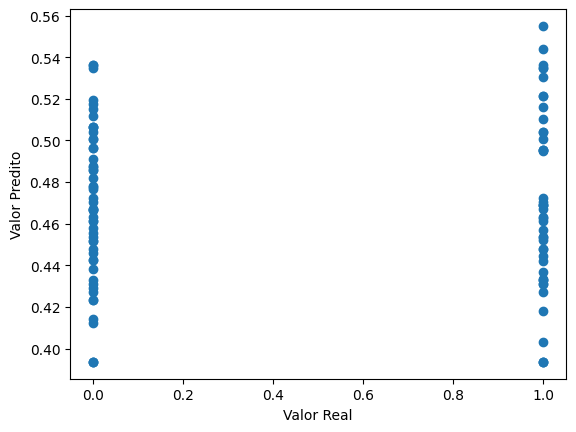

In [90]:
plt.scatter(y_test,y_test_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [91]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_test_predito - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_test_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_test_predito))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_test_predito)))
print("R2-score: %.2f" % r2_score(y_test_predito , y_test) )

Soma dos Erros ao Quadrado (SSE): 25 
Erro Quadrático Médio (MSE): 0.25
Erro Médio Absoluto (MAE): 0.50
Raiz do Erro Quadrático Médio (RMSE): 0.50 
R2-score: -161.00


# O modelo KNN foi melhor porque o R²-score do modelo de regressão linear indica um desempenho muito pobre.